# **Exploring cell type abundance with atlasapprox API**

Investigating cell atlases often requires analyzing gene expression patterns across selected cell type and organs. This tutorial demonstrates using the [*Atlasapprox* API](https://atlasapprox.readthedocs.io/en/latest/python/index.html) to query and analyze gene expression data based on target cell type. By the end of this tutorial, you will understand how to explore and visualize gene expression data using the *Atlasapprox* API effectively.

### Contents
- Querying the location of a single cell type
- Querying expression data for marker genes in a single organ
- Querying expression data for marker genes across multiple organs
- Querying high-expression locations for marker genes

## **Initialize the API**

To begin, import the *atlasapprox* Python package and create an API object:

In [ ]:
import atlasapprox

api = atlasapprox.API()

For complete setup instructions, see the [Quick Start Tutorial](https://github.com/Amber-Xu914/atlasapprox_api_tutorials/blob/main/python/quick_start.ipynb).

## **Querying the location of a single cell type**

An easy way to begin is to use the `celltype_location` method from the *atlasapprox* API to retrieve the location of the target cell type. This method returns a list of organs where the target cell type is present.

The following example demonstrates how to retrieve the organs where T cells are present in human:

In [2]:
T_location = api.celltype_location(
        organism='h_sapiens', 
        cell_type='T', 
        measurement_type='gene_expression')

display(T_location)

['bladder',
 'blood',
 'colon',
 'eye',
 'fat',
 'gut',
 'kidney',
 'liver',
 'lung',
 'lymphnode',
 'mammary',
 'marrow',
 'muscle',
 'pancreas',
 'prostate',
 'salivary',
 'skin',
 'spleen',
 'thymus',
 'tongue',
 'trachea',
 'uterus']

#### Output
This method returns a list of organs where that cell type is found.


You can use the `celltypexorgan` method to retrieve a complete table showing which other cell types are present in the organs where T cells are found.

In [54]:
T_table = api.celltypexorgan(
        organism='h_sapiens', 
        organs=None,
        # organs=['blood', 'bladder'],
        measurement_type='gene_expression', 
        boolean=True)

display(T_table)

organs,bladder,blood,colon,eye,fat,gut,heart,kidney,liver,lung,...,muscle,pancreas,prostate,salivary,skin,spleen,thymus,tongue,trachea,uterus
cell types,,,,,,,,,,,,,,,,,,,,,
T,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
macrophage,True,True,False,True,True,False,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True
B,True,True,True,True,True,True,False,True,False,True,...,False,True,False,True,True,True,True,True,True,True
fibroblast,True,False,True,True,True,True,True,False,True,True,...,True,True,True,True,True,False,True,True,True,True
plasma,True,True,True,True,True,True,False,False,True,True,...,False,True,False,True,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
horizontal,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
keratinocyte,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
keratocyte,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Output
This method returns a *pandas.DataFrame* where:
- Each row represents a cell type.
- Each column corresponds to an organ
- The value indicate the presence/absence (with boolean=True) or number of sampled cells/nuclei (with boolean=False)

## **Querying expression data for marker genes in a single organ**

If you are uncertain about which genes to investigate, starting with marker genes can be useful. The example below illustrates how to obtain marker genes for a specific organ and cell type of interest, and then query their average expression.

Begin by using the markers method to get the top 10 marker genes for T in the human bladder:

In [14]:
markers_in_human_blad_T = api.markers(
    organism='h_sapiens', 
    organ='lung', 
    cell_type='T', 
    number=10
)

display(markers_in_human_blad_T)

['CD3E',
 'CD3D',
 'CD3G',
 'TRAC',
 'CD2',
 'GPR171',
 'TRAT1',
 'BCL11B',
 'TRBC2',
 'THEMIS']

Next, use the `average` method to retrieve the average gene expression of these genes:

In [26]:
human_blad_markers_expr = api.average(
    organism='h_sapiens',
    organ='bladder',
    features=markers_in_human_blad_T
)

display(human_blad_markers_expr)

,mast,macrophage,B,plasma,T,NK,plasmacytoid,urothelial,venous,capillary,lymphatic,fibroblast,smooth muscle,pericyte
CD3E,0.125592,0.193873,0.191272,0.300453,4.764482,3.695696,0.101148,0.014684,0.052105,0.019488,0.007790,0.019939,0.028015,0.025043
CD3D,0.234629,0.266397,0.409390,0.427265,7.001246,7.245528,0.101148,0.016752,0.074421,0.063155,0.007885,0.040016,0.048706,0.029599
CD3G,0.073976,0.108979,0.192699,0.158257,3.083186,3.188066,0.000000,0.006466,0.044554,0.020381,0.007885,0.016761,0.019309,0.012194
TRAC,0.147455,0.200119,0.379536,0.323158,4.998813,3.647517,0.112289,0.014403,0.084565,0.022051,0.036982,0.519351,0.092870,0.023281
CD2,0.169104,0.278958,0.475522,0.424745,6.502021,7.089199,0.121855,0.015849,0.092317,0.064514,0.007885,0.034018,0.049465,0.023195
GPR171,0.049242,0.092165,0.213727,0.119001,2.327157,1.462695,0.000000,0.005986,0.017132,0.006772,0.000000,0.013936,0.013398,0.013580
TRAT1,0.034880,0.050508,0.083901,0.085733,1.342214,0.773302,0.000000,0.004324,0.031409,0.020381,0.000000,0.006823,0.007145,0.005730
BCL11B,0.062447,0.120549,0.199633,0.231276,2.639761,2.633327,0.101148,0.067276,0.039933,0.000000,0.002660,0.026683,0.015980,0.013441
TRBC2,0.138939,0.227528,0.884715,0.315459,4.857747,4.917797,0.202296,0.019003,0.042505,0.075192,0.015675,0.024724,0.031562,0.032740
THEMIS,0.003832,0.029656,0.073441,0.037991,0.609163,0.607433,0.101148,0.001561,0.000000,0.000000,0.000000,0.002789,0.005487,0.000000


#### Output
This *Pandas DataFrame* displays the average gene expression of the top ten marker genes for T cells in the human bladder across all available cell types.

## **Querying expression data for marker genes across multiple organs**

It is also possible to explore marker genes across multiple organs within the same species and cell type.

The following example demonstrates how to obtain marker genes for several target organs and calculate their average gene expression.

In [28]:
# organ_list = T_location
organ_list = ['bladder', 'blood', 'colon']

for organ in organ_list:
    markers_in_human_T = api.markers(
        organism='h_sapiens', 
        organ=organ, 
        cell_type='T', 
        number=10
    )

    human_markers_expr = api.average(
        organism='h_sapiens',
        organ=organ,
        features=markers_in_human_T
    )

    print(f'Marker genes expression in {organ}:')
    display(human_markers_expr)


Marker genes expression in bladder:


,mast,macrophage,B,plasma,T,NK,plasmacytoid,urothelial,venous,capillary,lymphatic,fibroblast,smooth muscle,pericyte
IL7R,0.664889,2.182518,2.033654,1.312376,28.135704,9.253947,0.455166,0.076542,0.176367,0.078276,0.028784,0.106779,0.142393,0.144459
KLRB1,0.133462,0.221172,0.219827,0.284843,6.223657,1.770163,0.151722,0.015415,0.118211,0.015234,0.000000,0.029526,0.038319,0.016711
CD3D,0.234629,0.266397,0.409390,0.427265,7.001246,7.245528,0.101148,0.016752,0.074421,0.063155,0.007885,0.040016,0.048706,0.029599
TRAC,0.147455,0.200119,0.379536,0.323158,4.998813,3.647517,0.112289,0.014403,0.084565,0.022051,0.036982,0.519351,0.092870,0.023281
SCML4,0.016605,0.036199,0.280037,0.045873,0.883203,0.399052,0.000000,0.003677,0.005038,0.006772,0.005131,0.004861,0.002264,0.000489
CD3E,0.125592,0.193873,0.191272,0.300453,4.764482,3.695696,0.101148,0.014684,0.052105,0.019488,0.007790,0.019939,0.028015,0.025043
TCF7,0.211658,0.091793,0.277251,0.091191,0.969489,0.559059,0.000000,0.092858,0.070932,0.066461,0.004539,0.115293,0.234580,0.087630
RCAN3,0.160652,0.155659,0.472888,0.149248,1.671599,0.760903,0.183283,0.254829,0.059359,0.075714,0.062031,0.026424,0.126609,0.136794
CD40LG,0.023607,0.023028,0.034449,0.032247,0.705604,0.224116,0.000000,0.001458,0.019296,0.020381,0.000000,0.003260,0.003752,0.002005
SPOCK2,0.071826,0.124031,0.380520,0.190747,2.532631,1.840931,0.088608,0.006583,0.139516,0.142078,0.027342,0.016724,0.022150,0.019802


Marker genes expression in blood:


,HSC,neutrophil,basophil,myeloid,monocyte,macrophage,dendritic,erythrocyte,B,plasma,T,NK,plasmacytoid,platelet
CD3G,0.020631,0.004321,0.011025,0.0,0.008900,0.023867,0.000000,0.005833,0.028580,0.053066,4.385546,0.503251,0.000000,0.006374
CD3E,0.124166,0.013077,0.011682,0.0,0.020533,0.031793,0.035253,0.024319,0.038457,0.064806,4.817160,0.902440,0.733853,0.030171
CD3D,0.006005,0.029803,0.010917,0.0,0.016890,0.004781,0.067483,0.016244,0.039675,0.070532,5.097938,0.388782,0.040345,0.017165
TRAC,0.030122,0.005518,0.010917,0.0,0.015166,0.006290,0.000000,0.009169,0.112989,0.123445,5.330725,0.259370,0.250437,0.012749
IL32,0.059640,0.055365,0.013679,0.0,0.072040,0.094219,0.041346,0.036509,0.063592,0.134535,11.104210,4.491172,0.000000,0.062721
IL7R,0.087230,0.017485,0.000000,0.0,0.035839,0.045781,0.041346,0.024048,0.290216,0.123598,12.922119,1.329986,1.359255,0.024309
TRAT1,0.057195,0.001523,0.000000,0.0,0.003872,0.013311,0.000000,0.002653,0.005057,0.011439,1.518885,0.039383,0.000000,0.000000
BCL11B,0.003953,0.005837,0.000000,0.0,0.008514,0.014496,0.000000,0.007048,0.024271,0.054388,2.808195,0.999413,0.000000,0.025220
TRABD2A,0.000000,0.001531,0.000000,0.0,0.009098,0.013877,0.000000,0.002225,0.120867,0.015527,0.765957,0.028744,0.000000,0.000000
CD5,0.000000,0.001071,0.000000,0.0,0.002491,0.006203,0.000000,0.001333,0.008800,0.008303,0.533116,0.016915,0.000000,0.000000


Marker genes expression in colon:


,neutrophil,mast,monocyte,B,plasma,T,goblet,brush,crypt,transit amp,enterocyte,paneth,venous,capillary,fibroblast,enteroendocrine
IL7R,0.823445,1.267235,0.145074,1.114490,0.266519,33.401619,0.142437,0.003558,0.050159,0.034201,0.078309,0.128426,1.194315,0.083895,0.080801,0.041079
CD3E,0.040382,0.211732,0.042434,0.170154,0.048645,4.864869,0.041608,0.000000,0.017454,0.014510,0.023691,0.029011,0.099526,0.000000,0.031710,0.000000
CD3D,0.224794,0.133106,0.061376,0.210484,0.047069,5.070080,0.037477,0.000000,0.027820,0.012363,0.023916,0.059247,0.199053,0.000000,0.043336,0.000000
KLRB1,0.154444,0.000000,0.048358,0.234619,0.081353,7.393442,0.016229,0.043012,0.014015,0.006518,0.016729,0.028680,0.000000,0.083895,0.029697,0.000000
CD2,0.112301,0.070627,0.046721,0.125355,0.034200,4.843677,0.029021,0.000000,0.006043,0.005618,0.017474,0.029240,0.394478,0.093465,0.008256,0.017268
CD7,0.157870,0.310273,0.033392,0.135560,0.076977,4.733951,0.033752,0.059581,0.024423,0.002875,0.029731,0.036368,0.199053,0.205356,0.046665,0.017943
CCL5,0.028958,0.214139,0.144021,0.466883,0.346492,8.962721,0.088841,0.022995,0.043583,0.014140,0.061775,0.087824,0.119577,0.000000,0.078462,0.098193
LINC01871,0.079763,0.062478,0.037955,0.093925,0.039460,3.500733,0.020598,0.000000,0.007287,0.030309,0.016496,0.031610,0.000000,0.105955,0.033724,0.023500
TRBC1,0.040206,0.133106,0.033480,0.193458,0.035507,3.749583,0.031217,0.011498,0.022873,0.019478,0.020044,0.044010,0.049763,0.159765,0.046046,0.000000
CD3G,0.011424,0.062478,0.001872,0.074176,0.018876,1.911019,0.012220,0.000000,0.003344,0.000000,0.007290,0.006688,0.000000,0.000000,0.009898,0.000000


If you are interested in identifying these genes, the following example returns multple lists of marker genes, one for each queried organ.

In [55]:
# organs = T_location
organs = ['bladder', 'blood', 'colon']

for organ in organs:
    markers_in_human_T = api.markers(
        organism='h_sapiens', 
        organ=organ, 
        cell_type='T', 
        number=10
    )
    
    print(f'Marker genes in {organ}:')
    display(markers_in_human_blad_T)

Marker genes in bladder:


['CD3E',
 'CD3D',
 'CD3G',
 'TRAC',
 'CD2',
 'GPR171',
 'TRAT1',
 'BCL11B',
 'TRBC2',
 'THEMIS']

Marker genes in blood:


['CD3E',
 'CD3D',
 'CD3G',
 'TRAC',
 'CD2',
 'GPR171',
 'TRAT1',
 'BCL11B',
 'TRBC2',
 'THEMIS']

Marker genes in colon:


['CD3E',
 'CD3D',
 'CD3G',
 'TRAC',
 'CD2',
 'GPR171',
 'TRAT1',
 'BCL11B',
 'TRBC2',
 'THEMIS']

#### Output
This method returns multiple lists of marker genes, one for each queried organ.

## **Querying cell types with similar expression pattern**

You may interested in finding cell types with similar expression patterns to a target cell type. You can use the following code to generate a dot plot for visualizing the gene expression data of the queried genes:

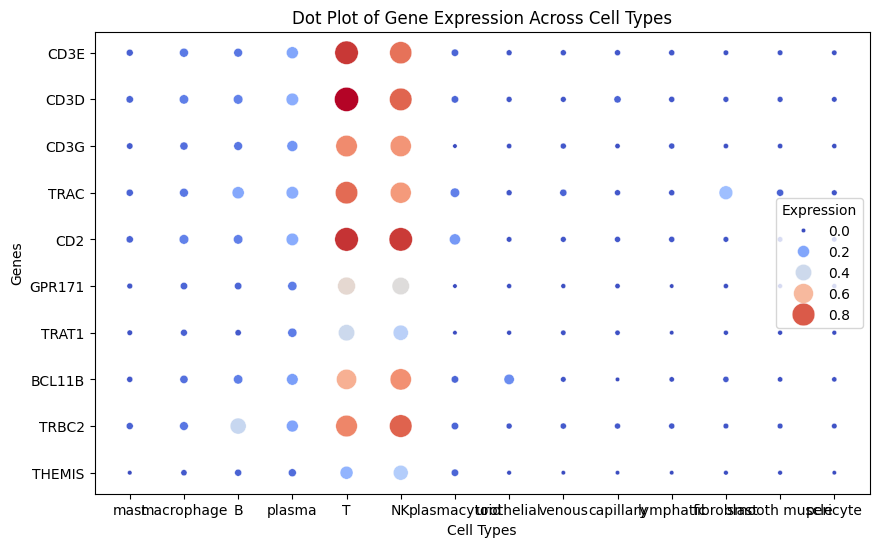

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get Pandas Dataframe by calling dotplot method
human_blad_df = api.dotplot(
    organism='h_sapiens', 
    organ='bladder', 
    features=markers_in_human_blad_T, 
    measurement_type= 'gene_expression')

# Melting the DataFrame to long-form
human_markers_expr_melted = human_blad_df.reset_index().melt(id_vars="index", var_name="Cell Type", value_name="Expression")
human_markers_expr_melted.rename(columns={"index": "Gene"}, inplace=True)

# Creating the dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=human_markers_expr_melted, x="Cell Type", y="Gene", size="Expression", hue="Expression", palette="coolwarm", sizes=(10, 300))

# Adding title and labels
plt.title("Dot Plot of Gene Expression Across Cell Types")
plt.xlabel("Cell Types")
plt.ylabel("Genes")

# Display the plot
plt.show()

## **Start from scratch**

The API provides several methods to display all available organisms, organs, and cell types. If you're starting from scratch, the following steps will guide you in exploring the API.

### 1. Get available organisms

The following example demonstrates how to retrieve a list of available organisms from the API. 

In [40]:
organisms = api.organisms()

display(organisms)

{'gene_expression': ['a_queenslandica',
  'a_thaliana',
  'c_elegans',
  'c_gigas',
  'c_hemisphaerica',
  'd_melanogaster',
  'd_rerio',
  'f_vesca',
  'h_miamia',
  'h_sapiens',
  'i_pulchra',
  'l_minuta',
  'm_leidyi',
  'm_murinus',
  'm_musculus',
  'n_vectensis',
  'o_sativa',
  'p_crozieri',
  'p_dumerilii',
  's_lacustris',
  's_mansoni',
  's_mediterranea',
  's_pistillata',
  's_purpuratus',
  't_adhaerens',
  't_aestivum',
  'x_laevis',
  'z_mays']}

### 2. Get available organs

The following example demonstrates how to retrieve a list of available organs under chosen organism(*human*).

In [41]:
human_organs = api.organs(organism='h_sapiens')

display(human_organs)

['bladder',
 'blood',
 'colon',
 'eye',
 'fat',
 'gut',
 'heart',
 'kidney',
 'liver',
 'lung',
 'lymphnode',
 'mammary',
 'marrow',
 'muscle',
 'pancreas',
 'prostate',
 'salivary',
 'skin',
 'spleen',
 'thymus',
 'tongue',
 'trachea',
 'uterus']

### 3. Get available cell types

The following example demonstrates how to retrieve a list of available cell types under chosen organism(*human*) and organ(*lung*).

In [42]:
celltypes_human_lung = api.celltypes(organism='h_sapiens', organ='lung', measurement_type='gene_expression')

display(celltypes_human_lung)

['neutrophil',
 'basophil',
 'monocyte',
 'macrophage',
 'dendritic',
 'B',
 'plasma',
 'T',
 'NK',
 'plasmacytoid',
 'goblet',
 'AT1',
 'AT2',
 'club',
 'ciliated',
 'basal',
 'serous',
 'mucous',
 'arterial',
 'venous',
 'capillary',
 'CAP2',
 'lymphatic',
 'fibroblast',
 'alveolar fibroblast',
 'smooth muscle',
 'vascular smooth muscle',
 'pericyte',
 'mesothelial',
 'ionocyte']

### 4. Check available genes

The following example takes an organism (*human*) as a parameter and returns whether the selected gene is available in the API.

In [43]:
organism = 'h_sapiens'
human_genes = api.features(organism=organism)
aim_gene = 'MTRNR2L12'

# case-insensitive searching
if aim_gene.lower() in [element.lower() for element in human_genes]:
    print(f'{aim_gene} gene is available in {organism}.')
else:
    print(f'{aim_gene} gene is NOT available in {organism}.')

MTRNR2L12 gene is available in h_sapiens.


## **Conclusion** 

This tutorial demonstrates several methods for querying and analysing gene expression data based on target cell type.

Thank you for using the *atlasapprox* API. For more detailed information, please refer to the [official documentation](https://atlasapprox.readthedocs.io/en/latest/python/index.html).